<a href="https://colab.research.google.com/github/shravanc/data_mining/blob/master/Parkinson_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
      https://raw.githubusercontent.com/shravanc/datasets/master/parkinson_sample.csv \
      -O /content/parkinson_sample.csv

--2020-04-26 13:36:55--  https://raw.githubusercontent.com/shravanc/datasets/master/parkinson_sample.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 324250 (317K) [text/plain]
Saving to: ‘/content/parkinson_sample.csv’

/content/parkinson_ 100%[===================>] 316.65K  --.-KB/s    in 0.03s   

2020-04-26 13:36:55 (11.1 MB/s) - ‘/content/parkinson_sample.csv’ saved [324250/324250]



# Data Visualization

In [ ]:
import pandas as pd

filename = '/content/parkinson_sample.csv'
df = pd.read_csv(filename)
df

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0            1   72    0    25.6470  ...  25.986  0.42271  0.56963  0.11774
1            1   72    0    75.6570  ...  27.984  0.35842  0.52350  0.17555
2            1   72    0    68.6880  ...  25.399  0.45462  0.56983  0.16291
3            1   72    0    61.6690  ...  22.078  0.51563  0.61864  0.20037
4            1   72    0    89.6370  ...  27.200  0.44967  0.54700  0.18939
...        ...  ...  ...        ...  ...     ...      ...      ...      ...
2095        42   61    0    65.7570  ...  24.689  0.55307  0.57152  0.11229
2096        42   61    0   106.7600  ...  24.737  0.52205  0.57030  0.11601
2097        42   61    0    -4.2597  ...  24.315  0.58904  0.57961  0.16296
2098        42   61    0   115.6500  ...  23.240  0.54095  0.59527  0.15142
2099        42   61    0   156.8200  ...  23.411  0.44308  0.64552  0.17985

[2100 rows x 22 columns]

# Data Distribution

In [ ]:
df.describe()

subject#          age  ...          DFA          PPE
count  2100.000000  2100.000000  ...  2100.000000  2100.000000
mean     21.500000    64.404762  ...     0.652299     0.217377
std      12.123806     9.131039  ...     0.070405     0.092894
min       1.000000    36.000000  ...     0.519770     0.021983
25%      11.000000    58.000000  ...     0.595222     0.152380
50%      21.500000    65.000000  ...     0.642460     0.200170
75%      32.000000    72.000000  ...     0.708835     0.263622
max      42.000000    85.000000  ...     0.865600     0.731520

[8 rows x 22 columns]

In [ ]:
df['test_time'].lt(0).sum()

3

From the above it is evident the mean age is 64 and its standard deviation is 9.1 which is a small value, can assume to have no outliers. Whereas for test_time standard deviation value is more giving a hint as to have outliers in the column. And there are only three values that are negative, so it is ignored to fill it with the mean value. 

And also from the above non of the values are missing. All columns data are having same number of entries. And also many columns seems to have outliers by comparing mean and standard deviation of each column.

# Total number of features

In [ ]:
all_columns = list(df.columns)
len(all_columns)

22

# Total number of empty data in each features

---



In [ ]:
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

Hence there is no column with null value. All 12 features in the dataset has values filled correctly.

# Co-Relation between the dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


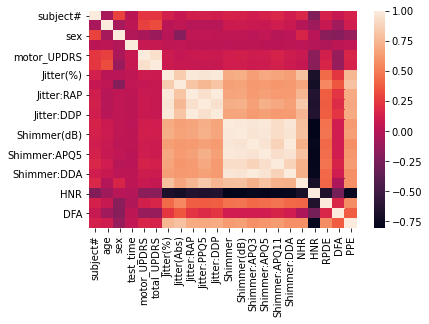

In [ ]:
import seaborn as sns

#correlation matrix
sns.heatmap(df.corr());

From the above, there is good correlation between the all the jitter columns and also between shimmer columns. And there seems to no correlation with the age and sex column.

# Checking for outliers

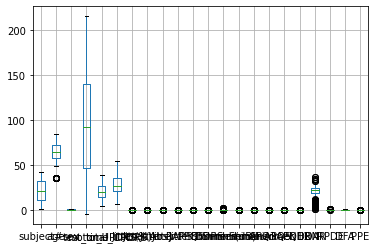

In [ ]:
df.boxplot()

In [ ]:
df.head(2)

subject#  age  sex  test_time  ...     HNR     RPDE      DFA      PPE
0         1   72    0     25.647  ...  25.986  0.42271  0.56963  0.11774
1         1   72    0     75.657  ...  27.984  0.35842  0.52350  0.17555

[2 rows x 22 columns]

# Plotting distribution over five columns each over (num_colms/5)+1 times

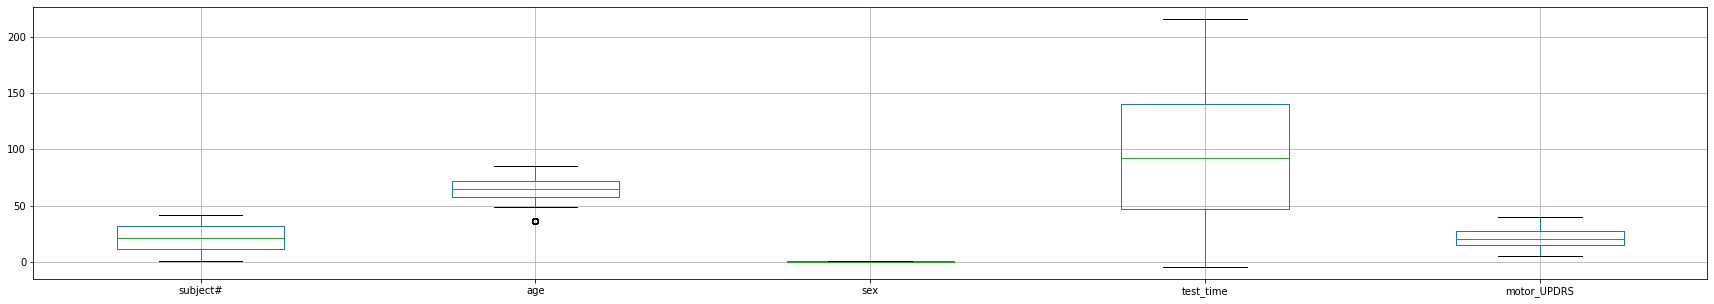

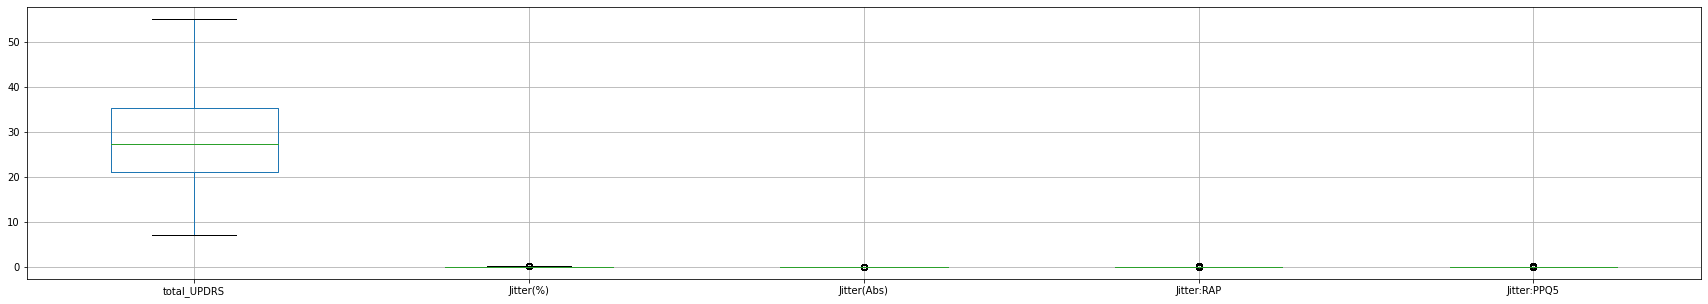

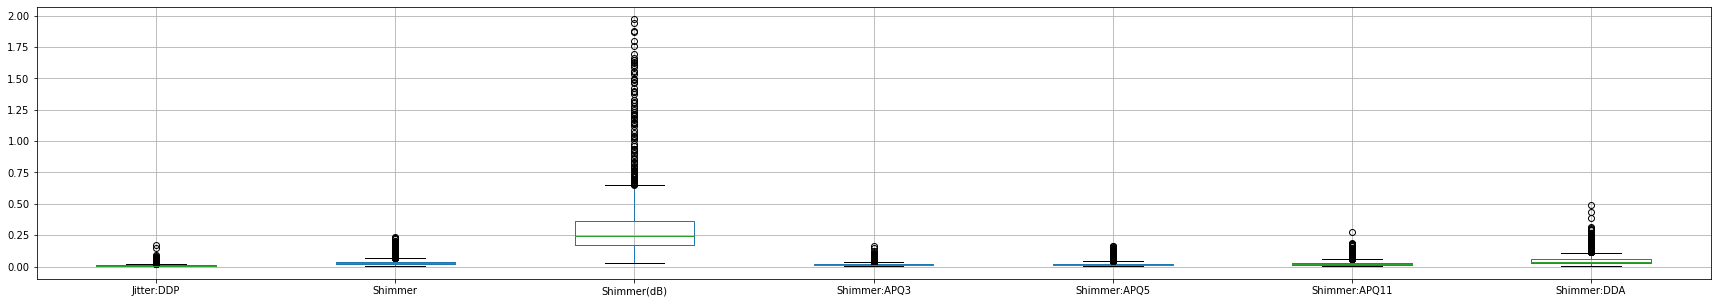

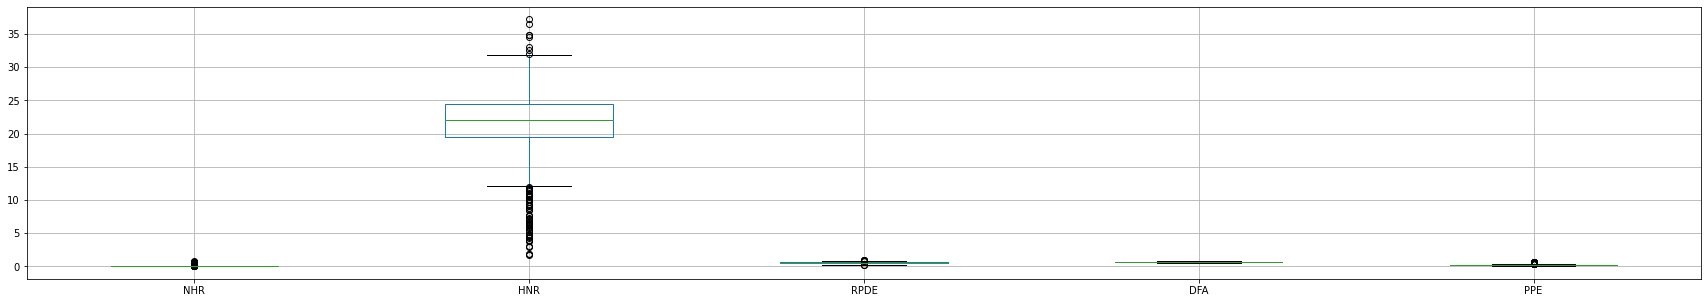

In [ ]:
import matplotlib.pyplot as plt


groups = [['subject#', 'motor_UPDRS'], ['total_UPDRS', 'Jitter:PPQ5'], ['Jitter:DDP', 'Shimmer:DDA'], ['NHR', 'PPE']]
for fields in groups:
  df.loc[:, fields[0]:fields[1]].boxplot(figsize=(30,5))
  plt.show()

In [ ]:
outliers = ['Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'NHR']
non_outliers = list(set(all_columns) - set(outliers))
non_outliers

['Jitter:RAP',
 'Jitter:PPQ5',
 'motor_UPDRS',
 'total_UPDRS',
 'subject#',
 'PPE',
 'RPDE',
 'test_time',
 'Jitter(%)',
 'DFA',
 'age',
 'Jitter(Abs)',
 'sex']

Defining Outliers and Non Outliers using boxplot.

# Normalization

In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
orig_df = df.copy()
robust_df = df.copy()
minmax_df = df.copy()

Method 1:
  - np.log
  - RobusSclar

In [ ]:
for outlier in outliers:
  robust_df[outlier] = np.log(getattr(robust_df, outlier))

robust_scaler = RobustScaler()
robust_df[all_columns] = robust_scaler.fit_transform(robust_df[all_columns])

Method 2:
 - MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
minmax_df[outliers] = scaler.fit_transform(minmax_df[outliers])

Saving both the files

In [ ]:
robust_df.to_csv('robust_scaler.csv')
minmax_df.to_csv('minmax_scaler.csv')
orig_df.to_csv('orig.csv')

# Analysing data with both dataset with RobustScaler and MinMaxScaler

## RobustScaler Pairplot Analysis

For outliers datasets

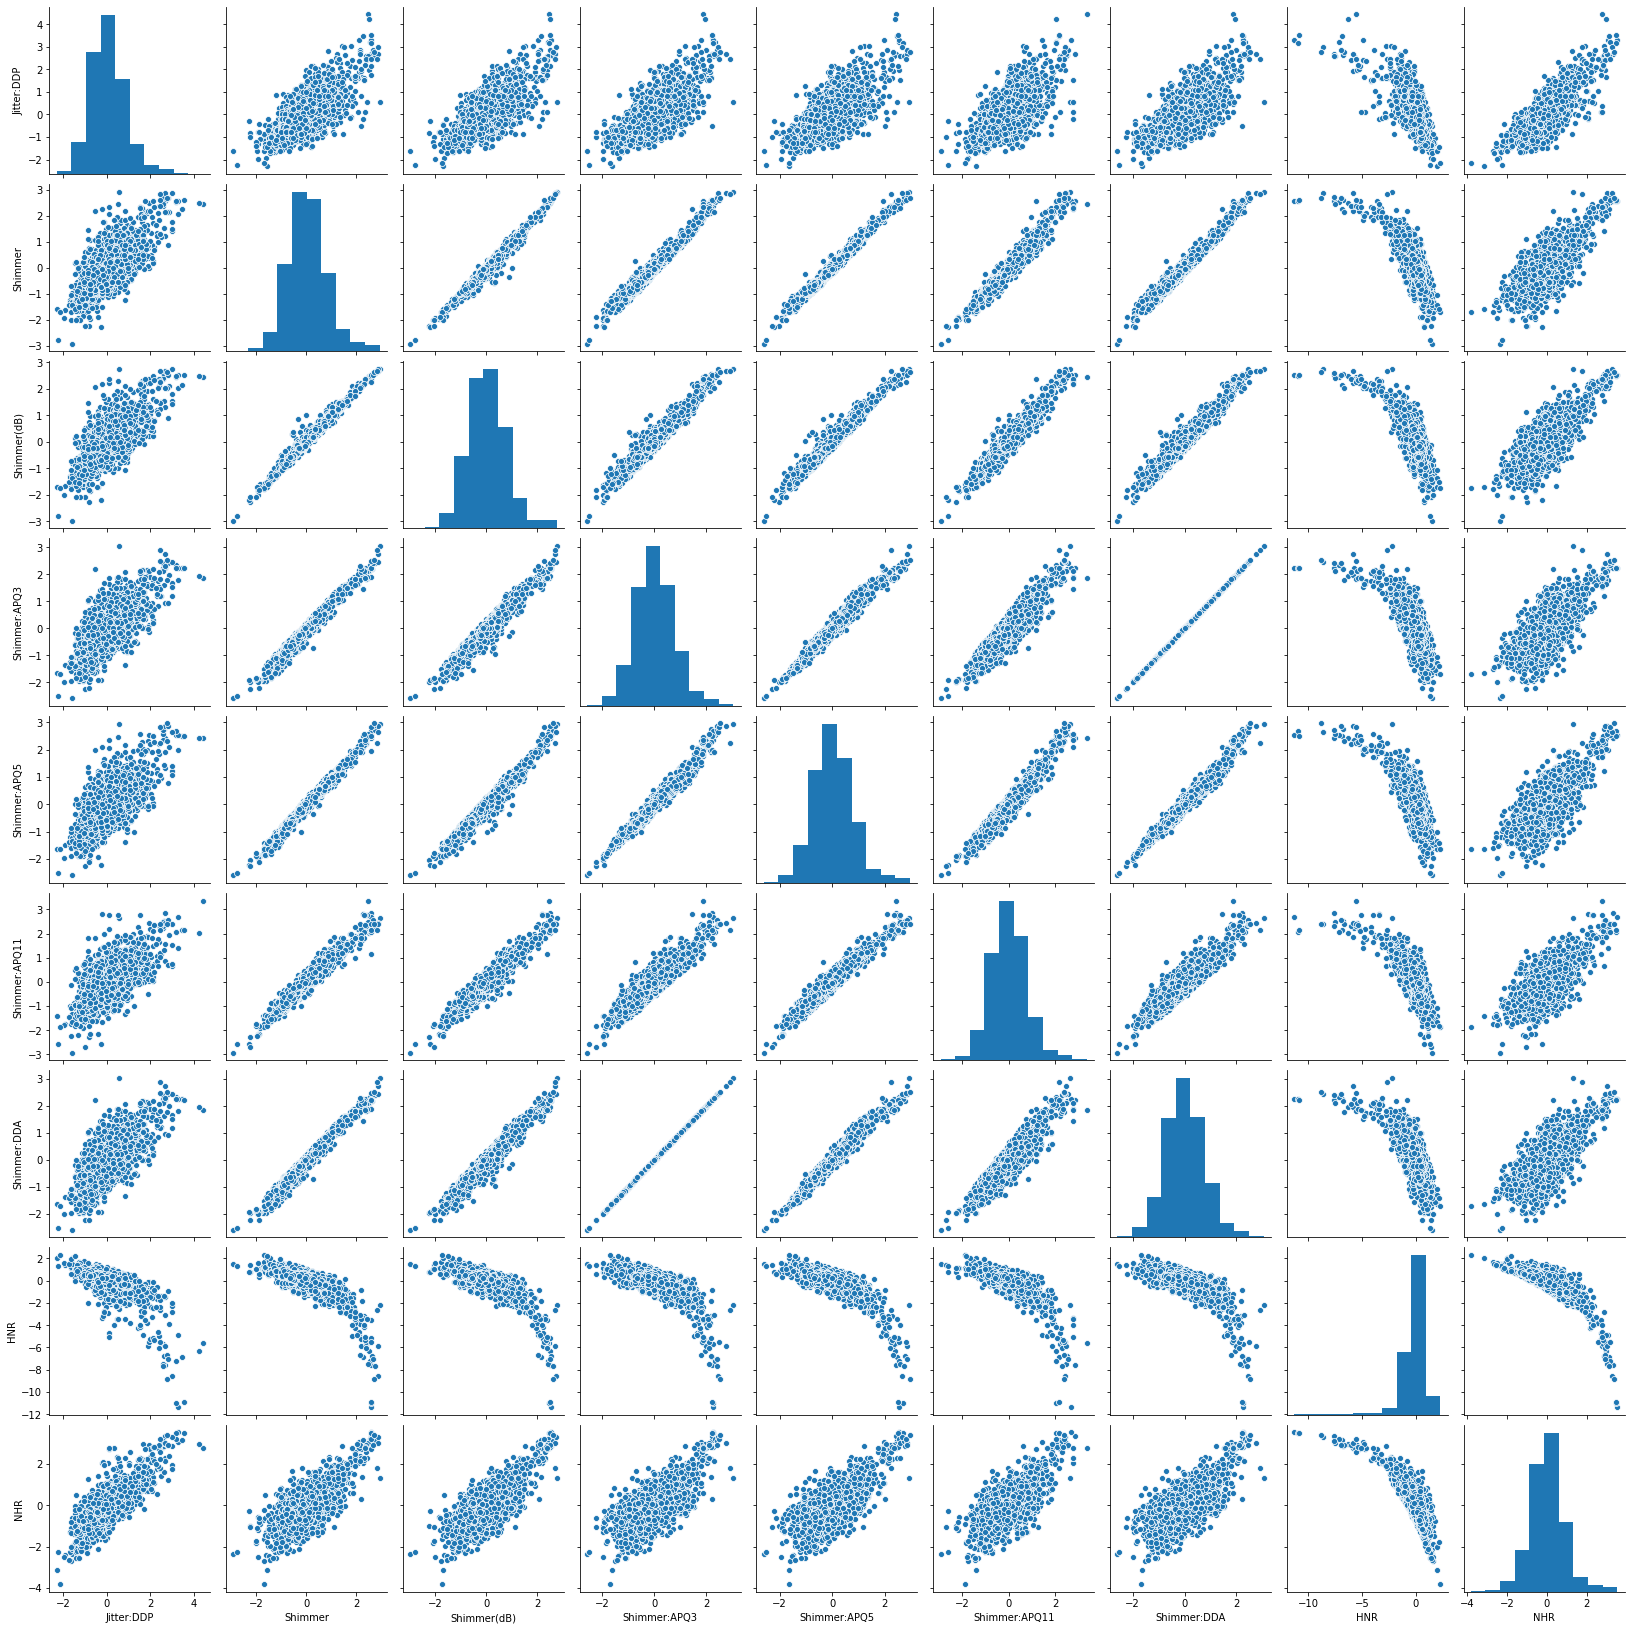

In [ ]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=robust_df[outliers].dropna())
plt.show()

For non outliers datasets

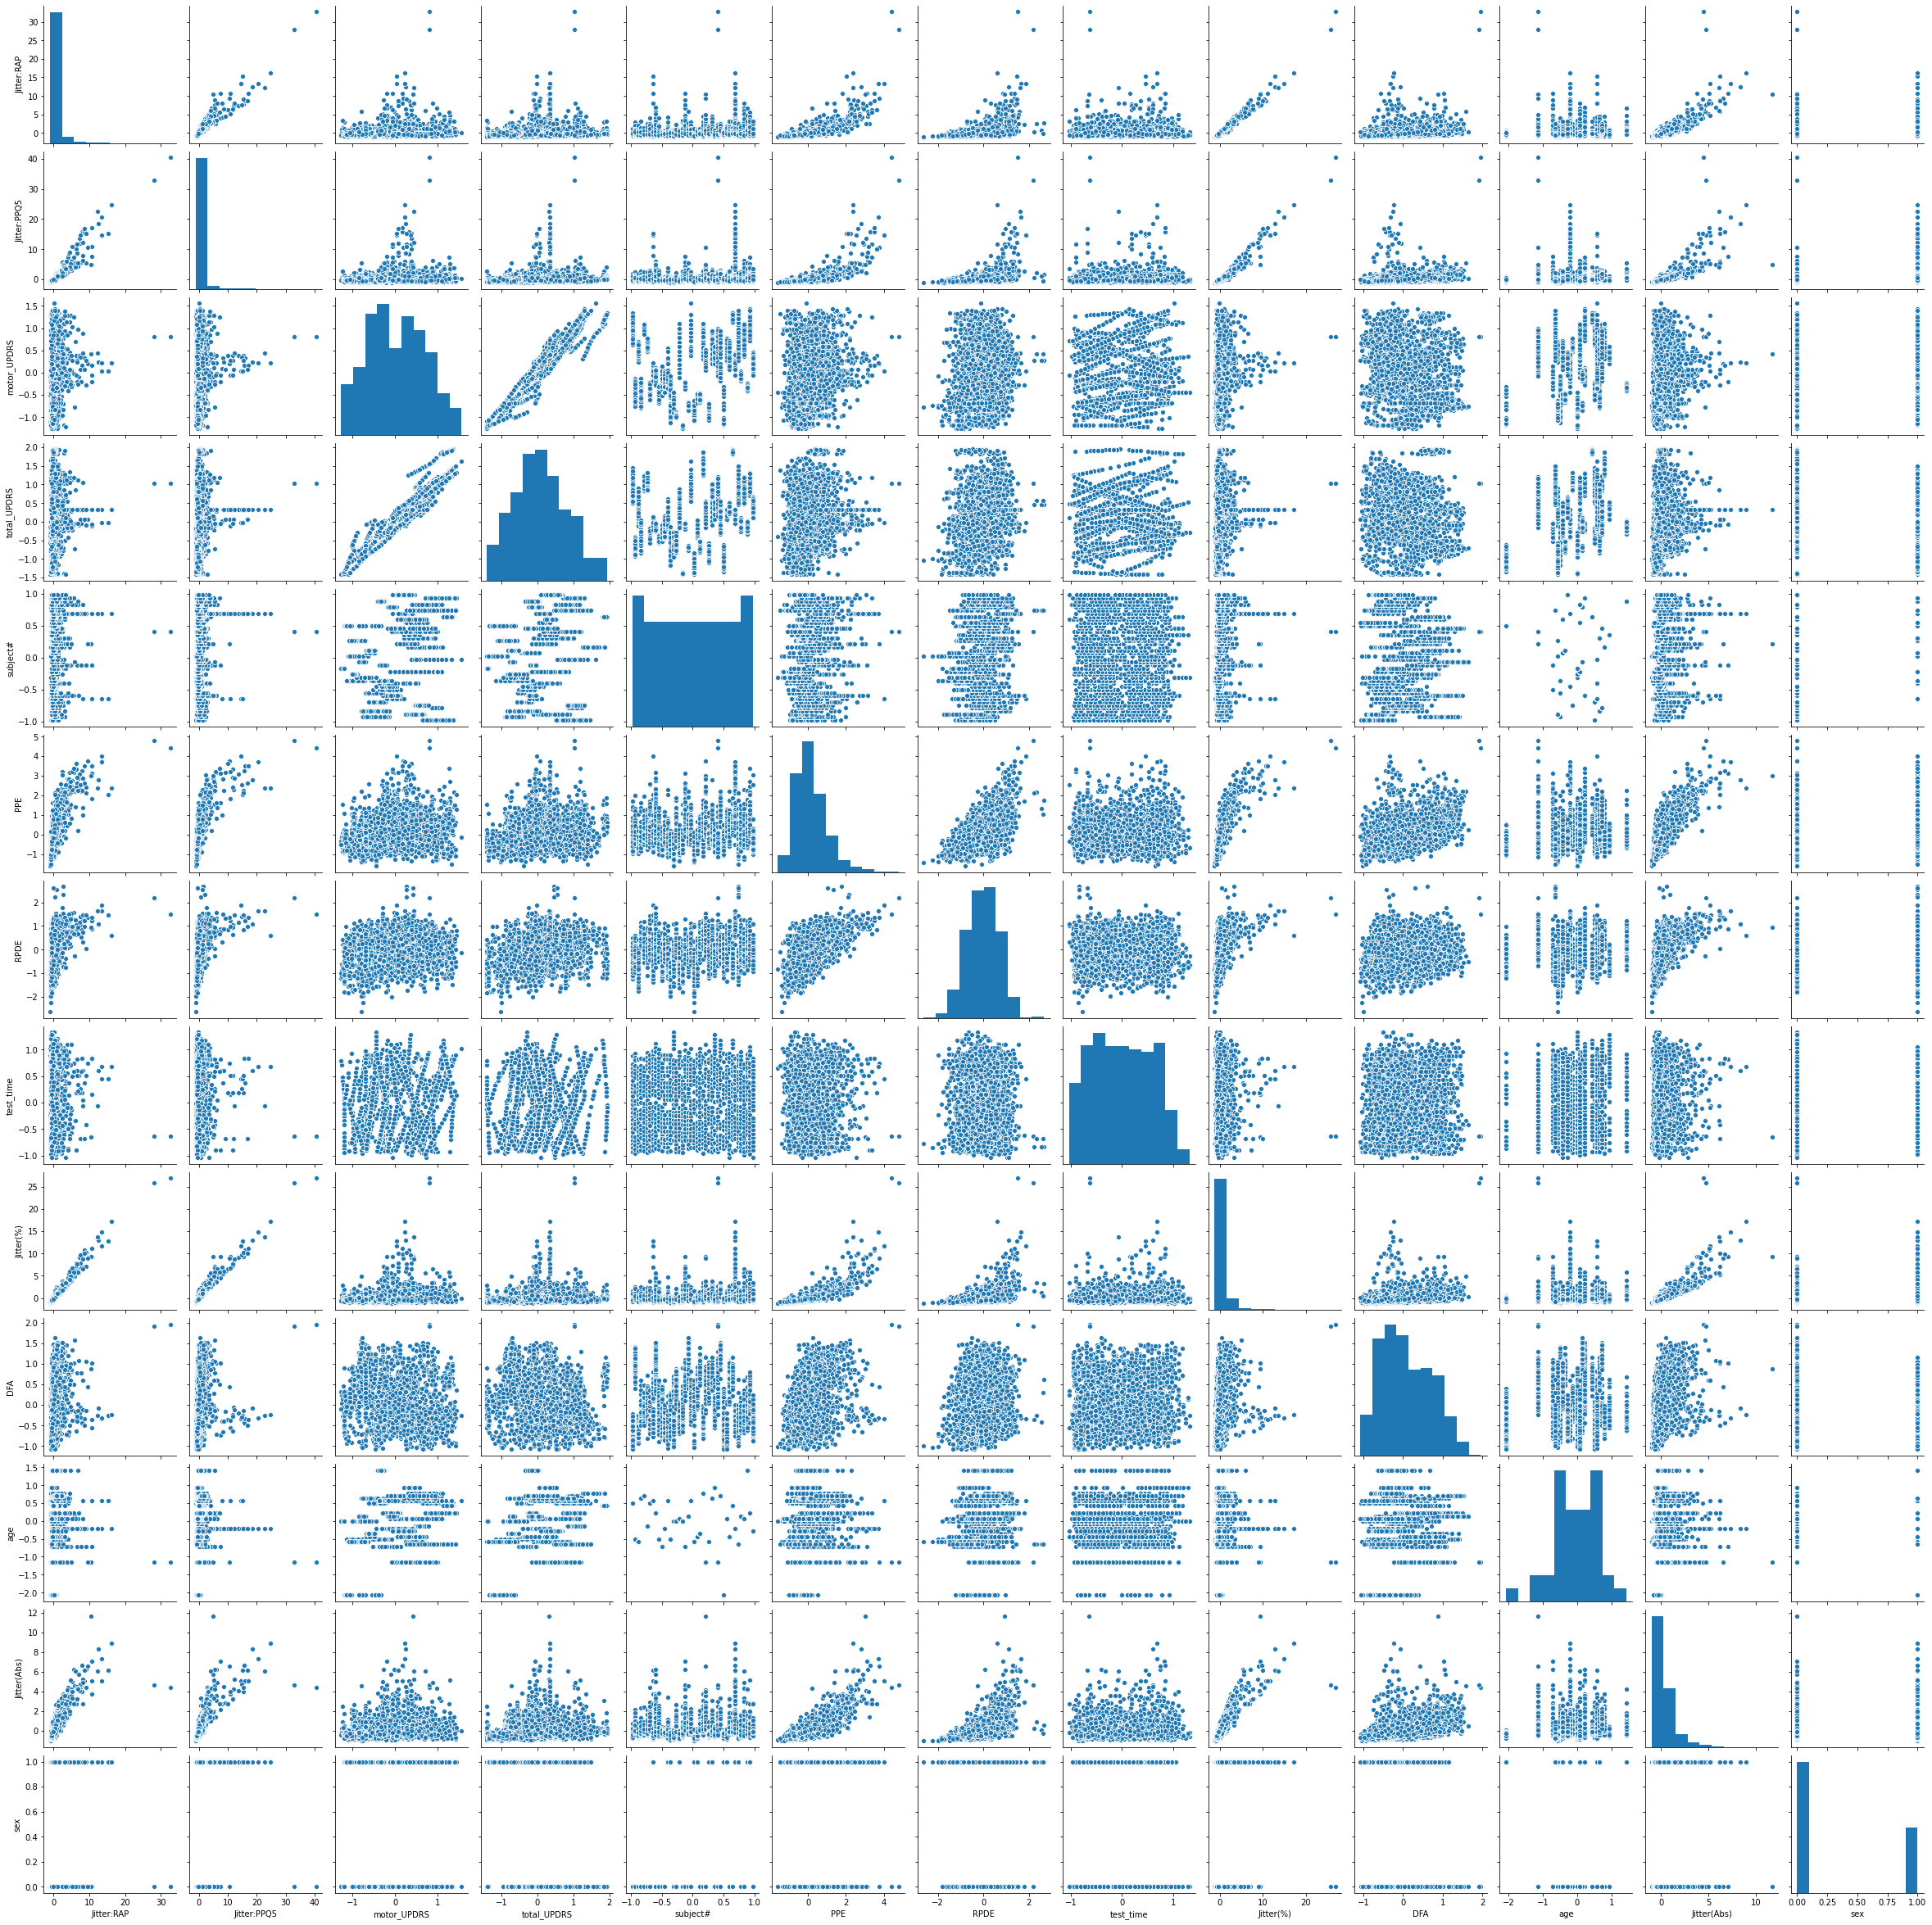

In [ ]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=robust_df[non_outliers].dropna())
plt.show()

## MinMaxScaler Pairplot Analysis

For Outlier

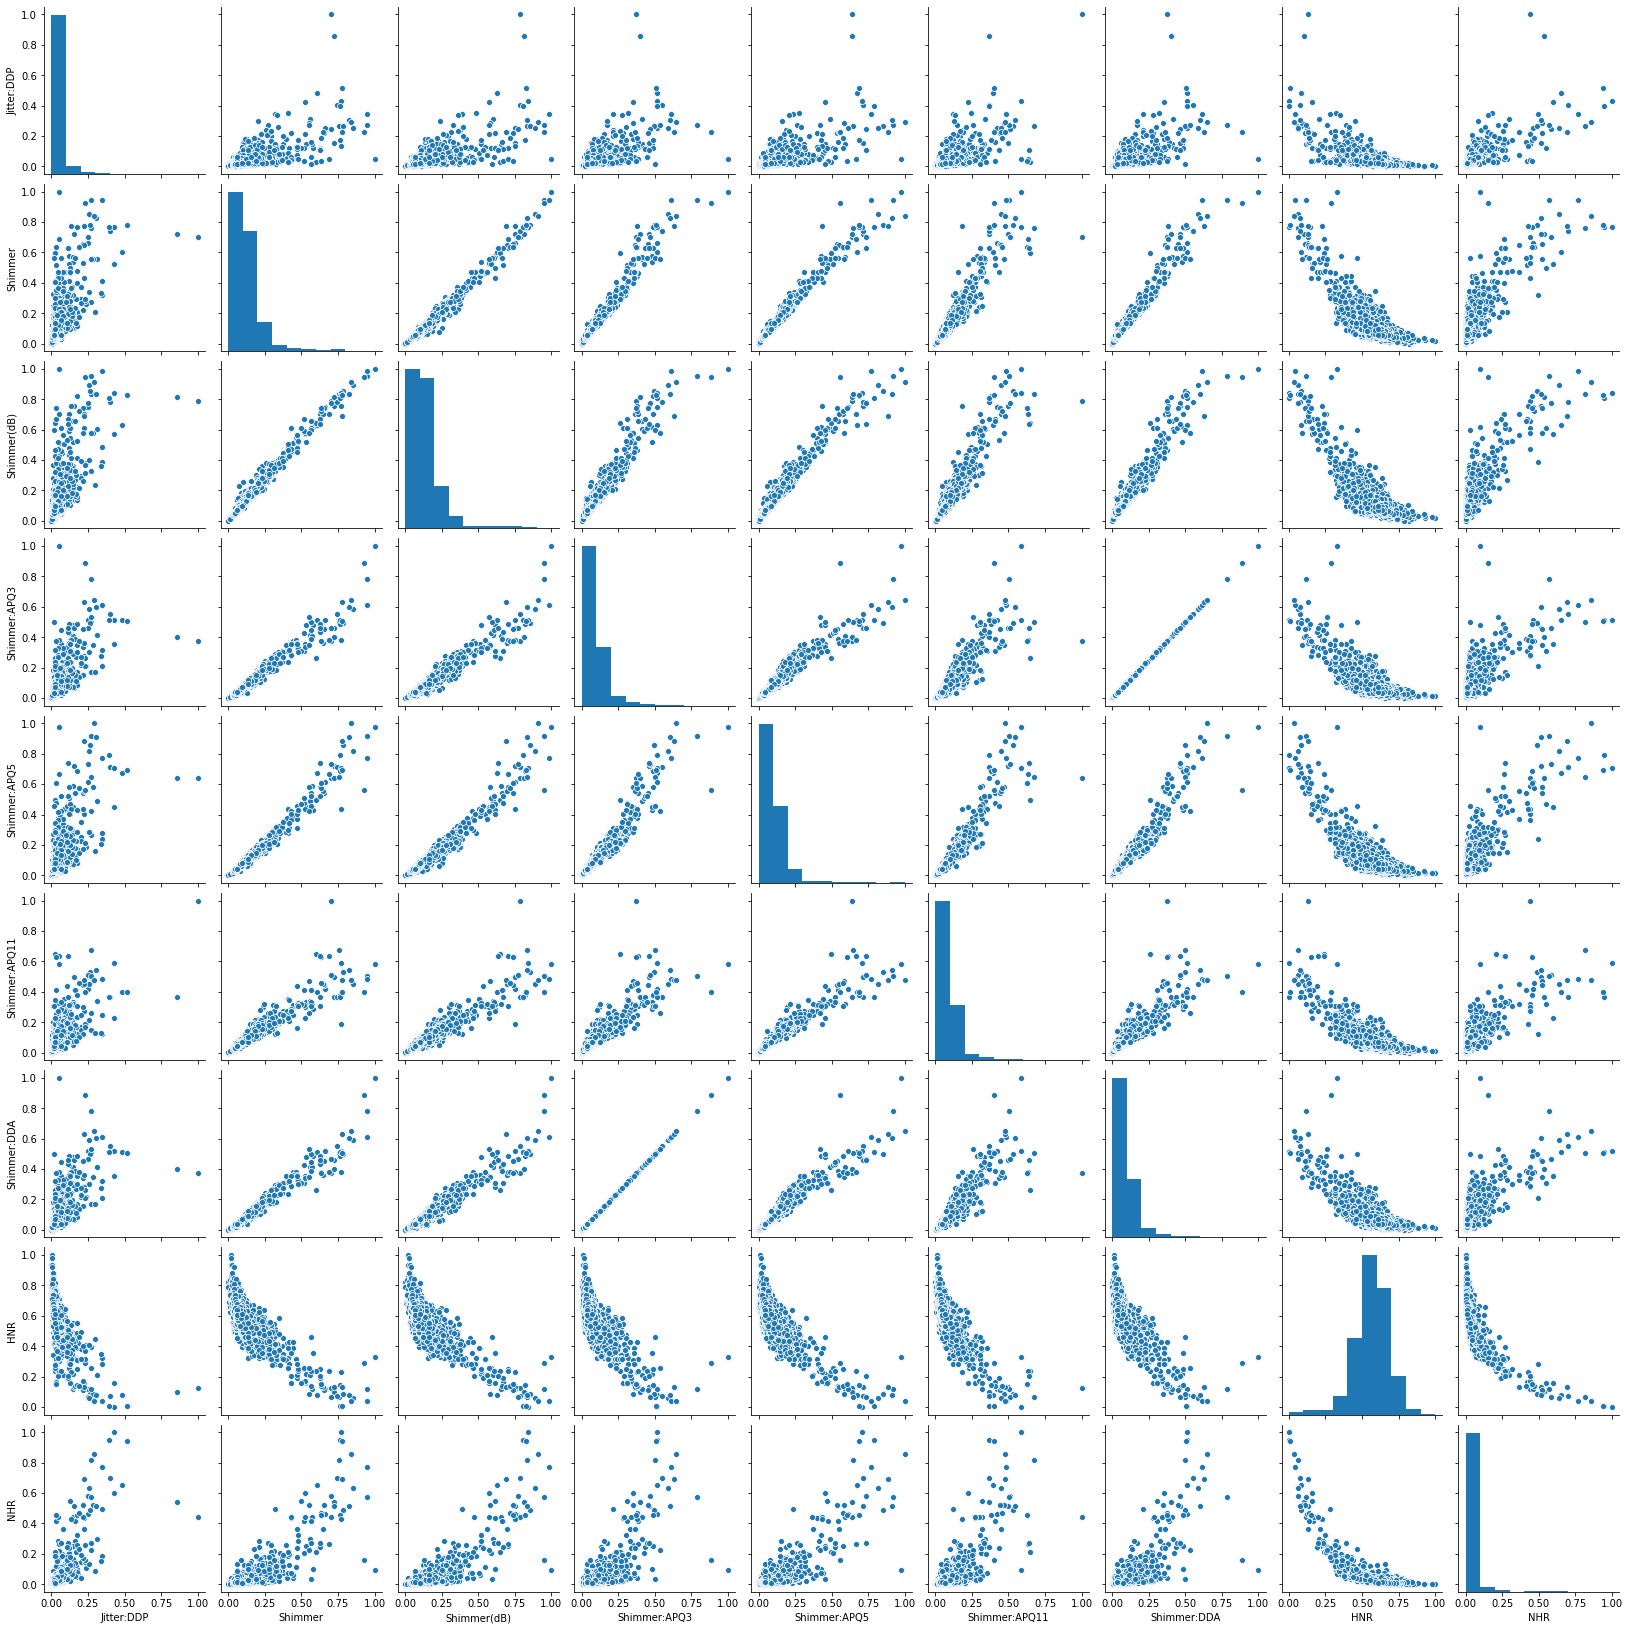

In [ ]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=minmax_df[outliers].dropna())
plt.show()

For non Outliers datasets

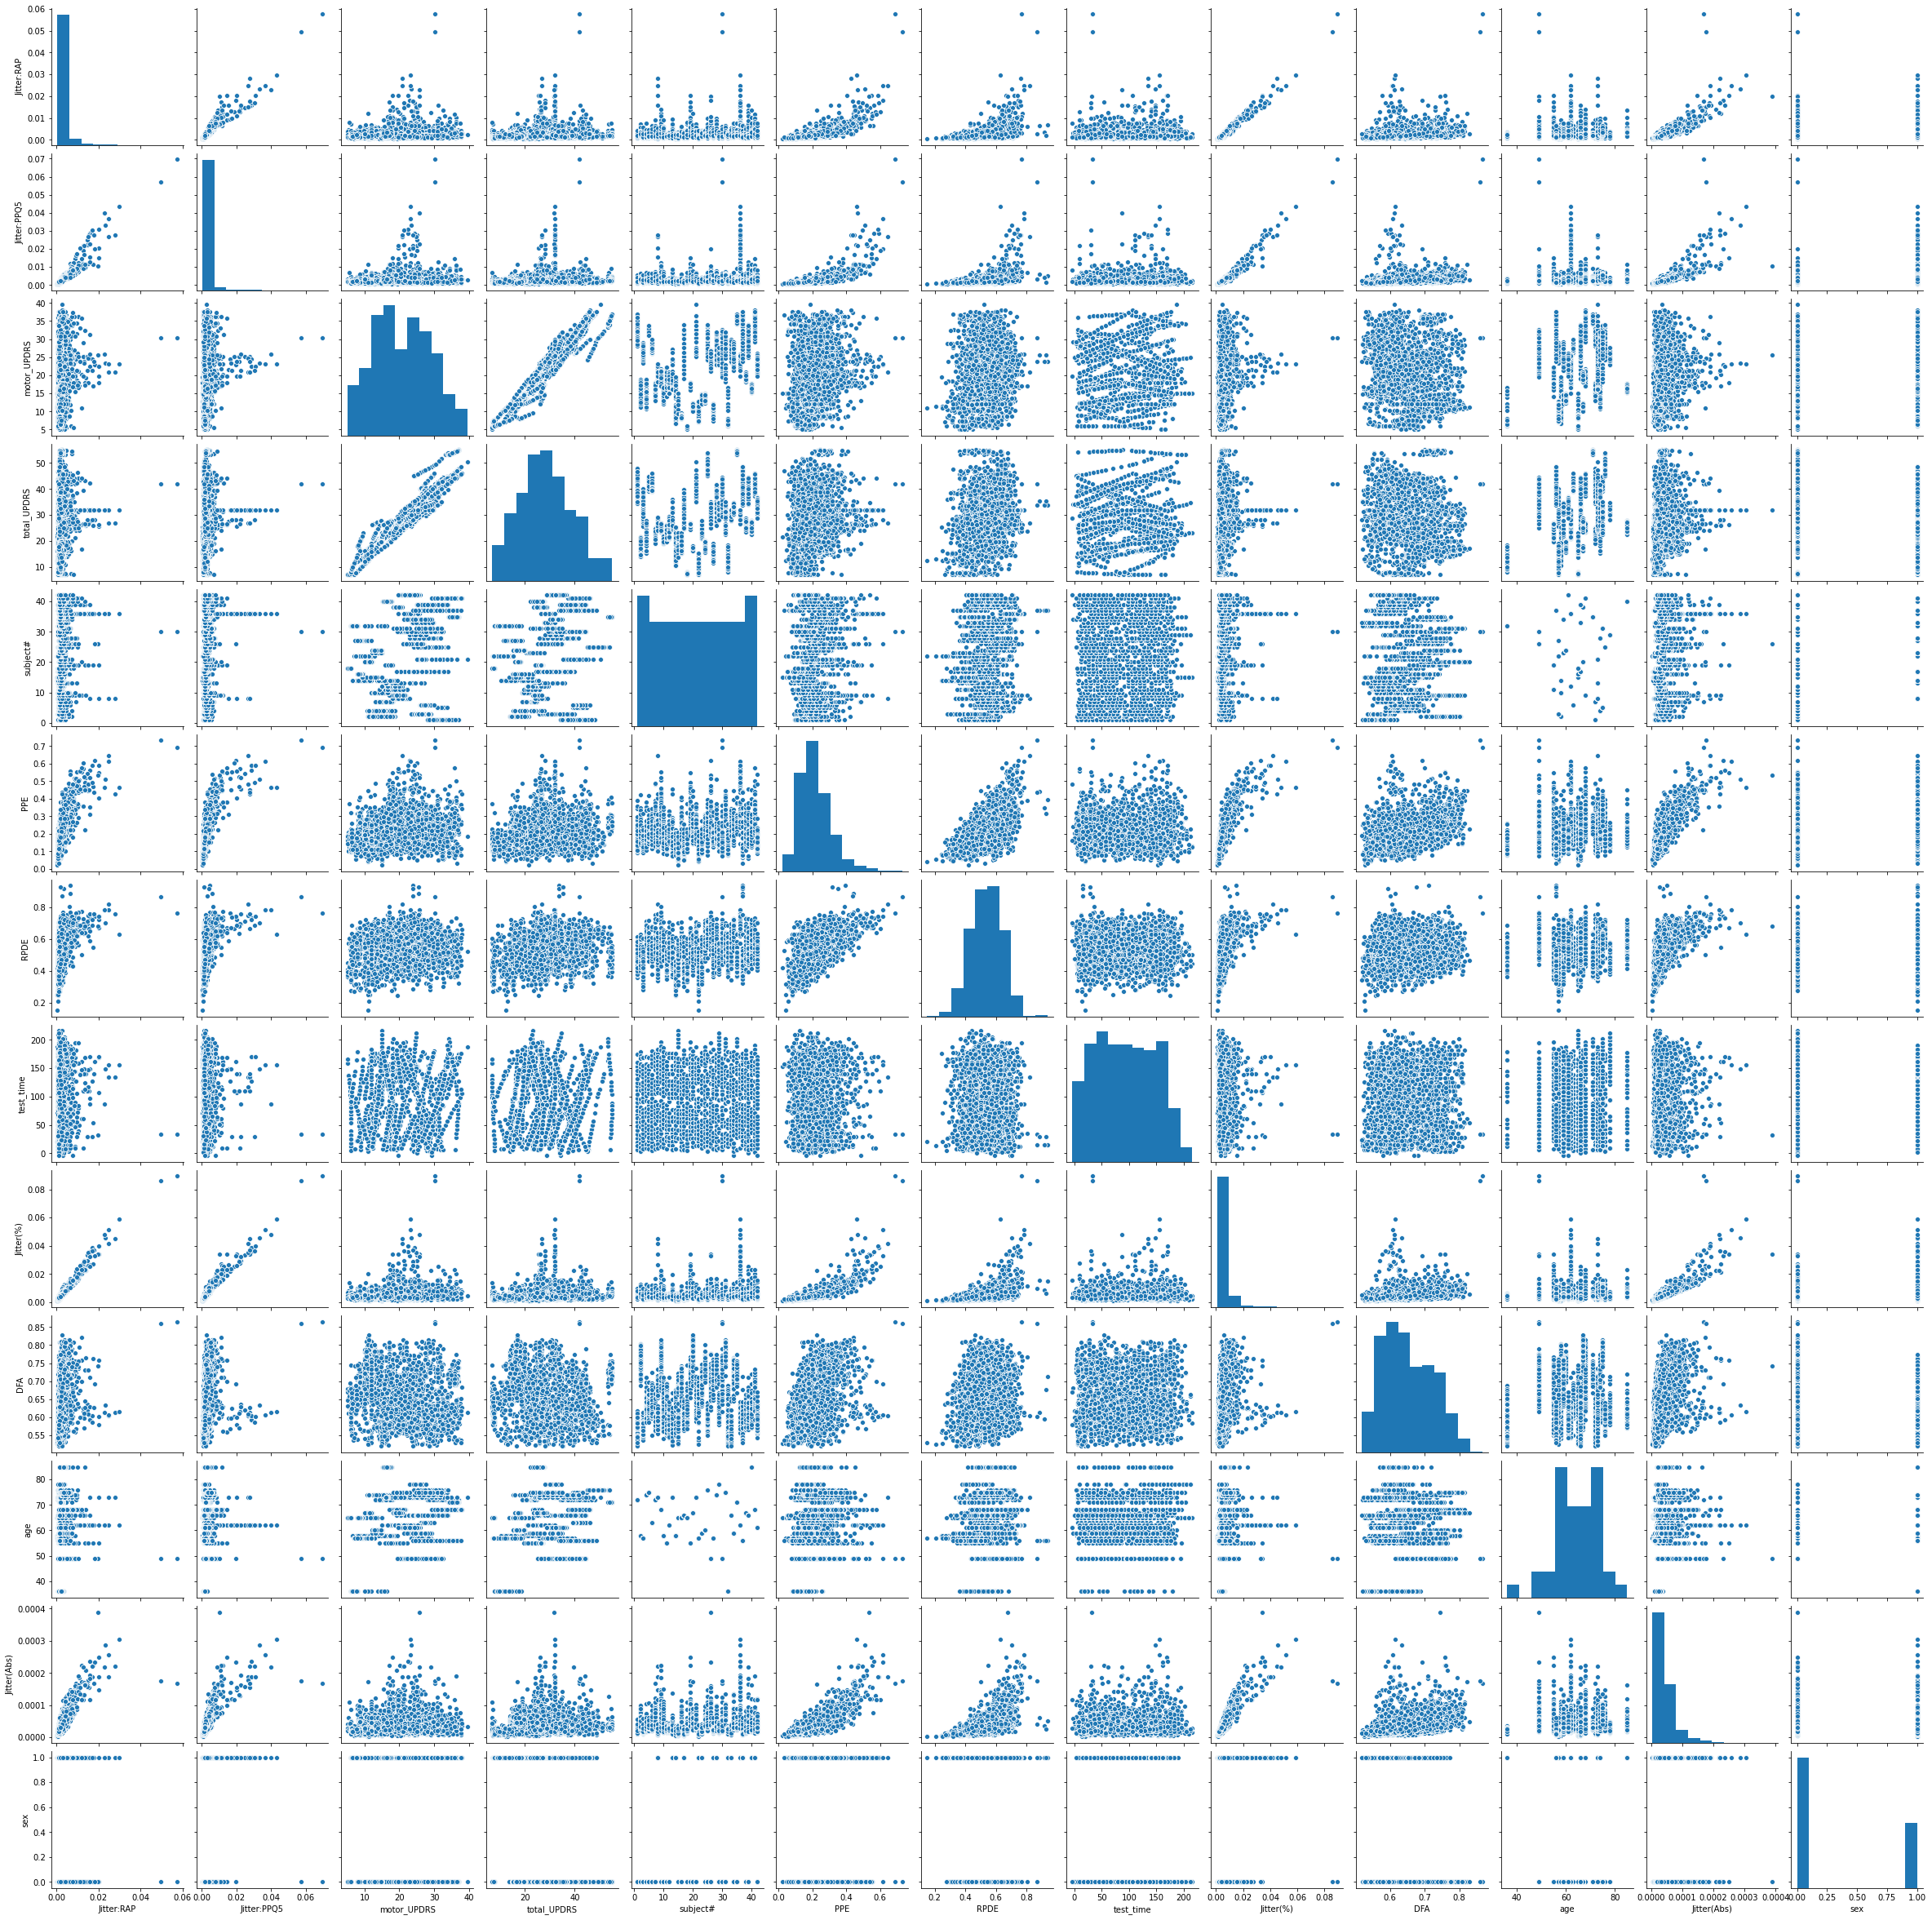

In [ ]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=minmax_df[non_outliers].dropna())
plt.show()

# Histograms

RobustScaler

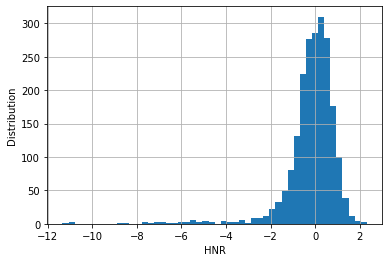

In [ ]:
robust_df['HNR'].hist(bins=50)
plt.xlabel('HNR')
plt.ylabel('Distribution')
plt.show()

MinMaxScaler

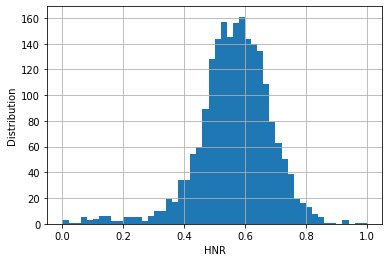

In [ ]:
minmax_df['HNR'].hist(bins=50)
plt.xlabel('HNR')
plt.ylabel('Distribution')
plt.show()

Original

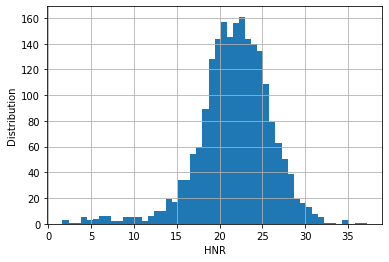

In [ ]:
orig_df['HNR'].hist(bins=50)
plt.xlabel('HNR')
plt.ylabel('Distribution')
plt.show()

In [ ]:
orig_df = pd.read_csv('orig.csv')
robust_df = pd.read_csv('robust_scaler.csv')
minmax_df = pd.read_csv('minmax_scaler.csv')

# From the Above it is evident that, data is getting skwed in first method. Later for the prediction, minmax_scaler datasets will be used

# K-Means Clustering

In [ ]:
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

In [ ]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# Clustering for Robustscalar Dataset

In [ ]:
k = 3

In [ ]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(robust_df)

In [ ]:
data_and_centers = np.r_[robust_df,clustered_data_sklearn.cluster_centers_]

In [ ]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


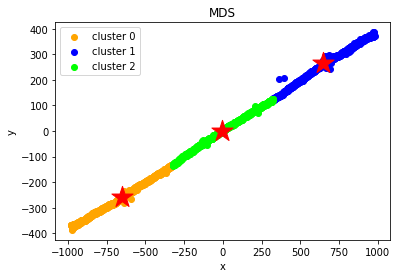

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# Clustering for MinMaxScalar Dataset


In [ ]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(minmax_df)

In [ ]:
data_and_centers = np.r_[minmax_df,clustered_data_sklearn.cluster_centers_]

In [ ]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


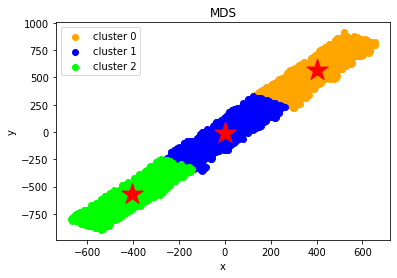

In [ ]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

# Regression Model

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
names_all = all_columns
names_outliers = outliers
names_no_outliers = non_outliers

In [ ]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [ ]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [ ]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

In [ ]:
TARGETS = ['motor_UPDRS',	'total_UPDRS'	]
TARGET = TARGETS[1]

y = minmax_df[TARGET]
X = minmax_df.drop(TARGET, axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
#search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
rf = RandomForestRegressor()

search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
search.fit(X_train, y_train)

print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.6min finished


Best CV score = 0.924:
Best parameters:  {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


# Evaluation

In [ ]:
# model - a trained regression model

def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
        
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
            
    return _mse, _mae, _r2

In [ ]:
RF_mse, RF_mae, RF_r2 = evaluate_model(X_test, y_test, RF_best_model)
print("RF_mse: ", RF_mse, "RF_mae: ", RF_mae, "RF_r2: ", RF_r2)

RF_mse:  6.583517238959424 RF_mae:  1.87804829379288 RF_r2:  0.9456485339051477


In [ ]:
# function to remove the string 'regresson__' from the names of the best parameters
def transform(dict, prefix):
    dict_prefix = {key:value for key,value in dict.items() if prefix in key}
    return {key.replace(prefix,''):value for key,value in dict_prefix.items()}

model = search.best_estimator_
final_model = model.fit(X, y)

# Save model

In [ ]:
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

Summary:

Dataset that is choosed to be a regression problem. Datasets contains 12 features / columns and we are predicting 'motor_UPDRS' in our model.

From the above we have clearly stated the data distribution by describing the data distribution and giving the insight into the dataset as to how the outliers and non outliers could be present. And further we have identified the outliers using boxplot and segregated the outliers and non outliers.

Then from the heat we understood the correlation between the features. It is mostly between the Jitter and the Shimmer features columns.

And we then used two normalization techniques minmax scaler and robust scaler. We then used parplots and histograms on the dataset with two scaler methods to understand further the distribution. From this we identifed that there is a scewing effect in the robust scler method.

Further we went on to try almost all the scaler methods and almost all the regression model sklearn supports. And then we have got the best result for the RandomForest and RobustSclare method. This results are enclosed in the project.

From the above experiment, we chose RandomForest and the MinMaxScaler method. We were able to achieve 92.4% accuracy with the combination.
The list of Scaler and Models that w have tried are as below:

# Models:
RandomForestRegressor
GradientBoostingRegressor

LinearRegression
LassoCV
Lasso
ElasticNet
LassoLars
OrthogonalMatchingPursuit
BayesianRidge
Ridge
SGDRegressor
PassiveAggressiveRegressor
TheilSenRegressor
LinearRegression
ARDRegression

# Normalization:
MinMaxScaler
minmax_scale
MaxAbsScaler
StandardScaler
RobustScaler
Normalizer
QuantileTransformer
PowerTransformer
PolynomialFeatures

Also we have tried the KNN clustering to further understand the data distribution and the types of cluster that are present in the data. Plots are done two different scaling method.

Finally we were able to get 92.4% accuracy.